In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/Project2- Fraudulent Jobs/Data/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(drive_dir + 'fake_job_postings.csv')

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# **Create new columns**

Create new columns that look into whether or not a certain column is NA

In [ ]:
df['department_na'] = df['department'].isna()
df['salary_range_na'] = df['salary_range'].isna()
df['location_na'] = df['location'].isna()
df['company_profile_na'] = df['company_profile'].isna()
df['requirements_na'] = df['requirements'].isna()
df['benefits_na'] = df['benefits'].isna()
df['employment_type_na'] = df['employment_type'].isna()
df['required_experience_na'] = df['required_experience'].isna()
df['required_education_na'] = df['required_education'].isna()
df['industry_na'] = df['industry'].isna()
df['function_na'] = df['function'].isna()


Create new columns that look at specific features that could predict fraudulence (top 10 most fraudulent industries, part-time employment, some high school coursework, and executive or entry level required experience)

In [ ]:
df['is_fraud_industry'] = (df['industry'] == 'Oil & Energy') | (df['industry'] == 'Accounting') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Biotechnology') | (df['industry'] == 'Hospital & Health Care')
df['is_part_time'] = df['employment_type'] == 'Part-time'
df['is_high_school_cw'] = df['required_education'] == 'Some High School Coursework'
df['is_executive_entry'] = (df['required_experience'] == 'Executive') | (df['required_experience'] == 'Entry level')


*   Create new colums with the character lengths for each textual data column (description, company profile, requirements, and benefits)


*   Fill any NA values with 0


In [ ]:
df['description_n']= df['description'].str.len()
df['company_profile_n']= df['company_profile'].str.len()
df['requirements_n']= df['requirements'].str.len()
df['benefits_n'] = df['benefits'].str.len()
df[['description_n','company_profile_n','requirements_n','benefits_n']] = df[['description_n','company_profile_n','requirements_n','benefits_n']].fillna(0)

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry_na,function_na,is_fraud_industry,is_part_time,is_high_school_cw,is_executive_entry,description_n,company_profile_n,requirements_n,benefits_n
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,True,False,False,False,False,False,905.0,885.0,852.0,0.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,False,False,False,False,False,False,2077.0,1286.0,1433.0,1292.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,True,True,False,False,False,False,355.0,879.0,1363.0,0.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,False,False,False,False,False,False,2600.0,614.0,1429.0,782.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,False,False,True,False,False,False,1520.0,1628.0,757.0,21.0


# **Create train df and test df**

In [ ]:
from sklearn.model_selection import train_test_split




*   Create a df with just fraudulent jobs
*   reate a df with just non-fraudulent jobs
*   Use these dfs to create a train df that has an equal number of fraudulent and non-fraudulent jobs
*   Create a test df that has the actual proportion of fraudulent to non-fraudulent jobs



In [ ]:
fraudulent_df = df[df['fraudulent'] == True]
train_fraud, test_fraud = train_test_split(fraudulent_df, train_size=0.7)
num_fraudulent = len(train_fraud)

nonfraud_df = df[df['fraudulent'] == False]
train_nonfraud, test_nonfraud = train_test_split(nonfraud_df, train_size=num_fraudulent)

train_df = pd.concat([train_fraud, train_nonfraud])
test_df = pd.concat([test_fraud, test_nonfraud])

In [ ]:
train_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry_na,function_na,is_fraud_industry,is_part_time,is_high_school_cw,is_executive_entry,description_n,company_profile_n,requirements_n,benefits_n
1407,1408,Data Entry Admin/Clerical Positions - Work Fro...,"US, AK, Anchorage",NaN,NaN,NaN,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,NaN,NaN,0,...,True,True,False,False,False,False,862.0,0.0,0.0,0.0
3345,3346,customer service representative,"US, CA, san jose",admin,13-20,NaN,What we're looking for:Do you like helping oth...,"The right candidate will:- Be upbeat, person...","Benefit includes: health and welfare coverage,...",0,...,False,False,True,False,False,True,640.0,0.0,724.0,520.0
17733,17734,Payroll Processor Entry Clerk Position - $50/Hr,"US, SC, Abbeville",NaN,250000-500000,NaN,"Preparing all sorts of source documents, ident...",Minimum Qualifications:• High Scho...,Follows set procedures and meets specific thro...,0,...,False,False,False,False,False,True,145.0,0.0,789.0,700.0
17600,17601,Admin Assistant Position,"AU, ,",NaN,NaN,NaN,Our Company is seeking a Part Time Admin Assis...,"The applicant must be computer literate, famil...",good work,0,...,True,True,False,False,False,False,1385.0,0.0,499.0,9.0
17569,17570,"CASH JOBS, Part Time Workers Needed.","AU, NSW, Sydney",NaN,NaN,NaN,"CASH JOBS, Part Time Workers Needed.Work Minim...",Work Minimum 1-2 Hours Per Day Anytime.,Suitable For Both Male And Female.,0,...,True,True,False,True,False,False,287.0,0.0,39.0,34.0


In [ ]:
test_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry_na,function_na,is_fraud_industry,is_part_time,is_high_school_cw,is_executive_entry,description_n,company_profile_n,requirements_n,benefits_n
10961,10962,Lead Software Engineer - Web,"US, WA, Seattle",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Do you want to help improve the lives of farme...,Creativity and passion for developing high q...,Perks: * A ground floor opportunity as part ...,0,...,False,False,False,False,False,False,1499.0,1099.0,1071.0,532.0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,...,False,False,True,False,False,False,2245.0,1016.0,1136.0,756.0
3947,3948,Project Manager: Engineer,"US, CA, Bakersfield",Oil & Energy,NaN,Process Unlimited and Refined Resources have p...,"We are a full-service engineering, project man...",Qualifications:Managed small to mid-size engin...,"What is Offered:* Clean, safe, enjoyable envir...",0,...,False,False,True,False,False,False,1245.0,776.0,641.0,419.0
1821,1822,Principal/Senior Mechanical Engineer (Package ...,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Exper...,We offer• Friendly colleagues in an industry w...,0,...,False,False,True,False,False,False,2116.0,415.0,360.0,769.0
17577,17578,Human Resources Assistant/Executive Assistant/...,"US, SC, Charleston",NaN,10000-250000,NaN,Maintains workflow by studying methods; implem...,"Skills/Qualifications: Reporting Skills, Admin...","Benefits: 401( k ) retirement account, Educat...",0,...,False,False,False,False,False,False,1361.0,0.0,247.0,191.0


In [ ]:
train_df['fraudulent'].value_counts()

1    606
0    606
Name: fraudulent, dtype: int64

In [ ]:
test_df['fraudulent'].value_counts()

0    16408
1      260
Name: fraudulent, dtype: int64

# **Create Logistic Regression**

## NA Values Logistic Regression



*   Set X values as the 11 NA columns  
*   Set y value to 'fraudulent'

In [ ]:
X_train_na = train_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na','function_na']] 
y_train_na = train_df['fraudulent']

X_test_na = test_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na','function_na']]
y_test_na = test_df['fraudulent']

*   Create a new LogisticRegression instance
*   Fit the model using the train df
*   Create predictions using the test df

In [ ]:
logr_na = LogisticRegression()

# Training my model
logr_na.fit(X_train_na, y_train_na)

# Predictions using only the testing data
preds = logr_na.predict(X_test_na)

In [ ]:
print(classification_report(y_test_na, preds))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     16408
           1       0.06      0.67      0.11       260

    accuracy                           0.83     16668
   macro avg       0.53      0.75      0.51     16668
weighted avg       0.98      0.83      0.89     16668



In [ ]:
confusion_matrix(y_test_na, preds, normalize='true')

array([[0.83477572, 0.16522428],
       [0.33076923, 0.66923077]])

In [ ]:
roc_auc = roc_auc_score(y_test_na, preds)
roc_auc

0.7520032441960769

## Features Logistic Regression

*   Set X values as the four specific feature columns 
*   Set y value to 'fraudulent'

In [ ]:
X_train_features = train_df[['is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry']] 
y_train_features = train_df['fraudulent']

X_test_features = test_df[['is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry']]
y_test_features = test_df['fraudulent']

*   Create a new LogisticRegression instance
*   Fit the model using the train df
*   Create predictions using the test df

In [ ]:
logr_features = LogisticRegression()

# Training my model
logr_na.fit(X_train_features, y_train_features)

# Predictions using only the testing data
preds = logr_na.predict(X_test_features)

In [ ]:
print(classification_report(y_test_na, preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     16408
           1       0.06      0.45      0.11       260

    accuracy                           0.89     16668
   macro avg       0.53      0.67      0.52     16668
weighted avg       0.98      0.89      0.93     16668



In [ ]:
confusion_matrix(y_test_na, preds, normalize='true')

array([[0.89243052, 0.10756948],
       [0.54615385, 0.45384615]])

In [ ]:
roc_auc = roc_auc_score(y_test_features, preds)
roc_auc

0.6731383377714436

## Character Length Logistic Regression

*   Set X values as the four character length columns 
*   Set y value to 'fraudulent'

In [ ]:
X_train_char_len = train_df[['description_n', 'company_profile_n','requirements_n', 'benefits_n']] 
y_train_char_len = train_df['fraudulent']

X_test_char_len = test_df[['description_n', 'company_profile_n','requirements_n', 'benefits_n']]
y_test_char_len = test_df['fraudulent']

*   Create a new LogisticRegression instance
*   Fit the model using the train df
*   Create predictions using the test df

In [ ]:
logr_char_length = LogisticRegression()

# Training my model
logr_char_length.fit(X_train_char_len, y_train_char_len)

# Predictions using only the testing data
preds = logr_char_length.predict(X_test_char_len)

In [ ]:
print(classification_report(y_test_char_len, preds))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     16408
           1       0.03      0.73      0.06       260

    accuracy                           0.63     16668
   macro avg       0.51      0.68      0.41     16668
weighted avg       0.98      0.63      0.76     16668



In [ ]:
confusion_matrix(y_test_na, preds, normalize='true')

array([[0.62536568, 0.37463432],
       [0.26923077, 0.73076923]])

In [ ]:
roc_auc = roc_auc_score(y_test_char_len, preds)
roc_auc

0.678067453024791

## Combined Logistic Regression

*   Set X values as the 19 columns used in the previous logistic regressions 
*   Set y value to 'fraudulent'

In [ ]:
X_train = train_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na','industry_na','function_na', 
                    'is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry', 'description_n', 
                    'company_profile_n','requirements_n', 'benefits_n']] 
y_train = train_df['fraudulent']

X_test = test_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na','industry_na','function_na', 
                    'is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry', 'description_n', 
                    'company_profile_n','requirements_n', 'benefits_n']]
y_test = test_df['fraudulent']

*   Create a new LogisticRegression instance
*   Fit the model using the train df
*   Create predictions using the test df

In [ ]:
logr = LogisticRegression()

# Training my model
logr.fit(X_train,y_train)

# Predictions using only the testing data
preds = logr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.80      0.88     16408
           1       0.06      0.78      0.11       260

    accuracy                           0.80     16668
   macro avg       0.53      0.79      0.50     16668
weighted avg       0.98      0.80      0.87     16668



In [ ]:
confusion_matrix(y_test, preds, normalize='true')

array([[0.79631887, 0.20368113],
       [0.21538462, 0.78461538]])

Determine and plot the ROC Curve

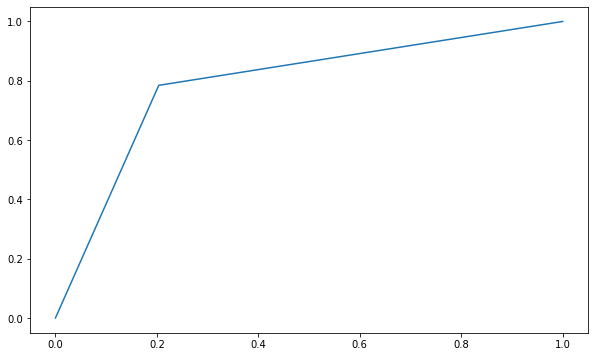

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)

In [ ]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.7904671267299253